In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

In [3]:
df = pd.read_csv('./Documents/diamonds.csv')

In [28]:
clarity = set(df['clarity'])
print('Available clarities are:  ',clarity)
color = set(df['color'])
print('Available colors are:     ',color)
cut = set(df['cut'])
print('Available cuts are:       ',cut)

Available clarities are:   {'I1', 'VVS1', 'VS2', 'VS1', 'SI1', 'VVS2', 'IF', 'SI2'}
Available colors are:      {'H', 'D', 'I', 'G', 'J', 'F', 'E'}
Available cuts are:        {'Fair', 'Good', 'Very Good', 'Premium', 'Ideal'}


In [42]:
IS2E = df.query('clarity == "SI1" and color == "E" and cut == "Fair"')
IS2E

,carat,cut,color,clarity,depth,table,price,x,y,z
938,0.80,Fair,E,SI1,56.3,63.0,2885,6.22,6.14,3.48
3148,0.90,Fair,E,SI1,65.0,61.0,3332,6.05,6.02,3.92
3528,0.92,Fair,E,SI1,65.6,57.0,3407,6.10,6.07,3.99
3970,0.90,Fair,E,SI1,65.5,59.0,3508,6.06,6.03,3.96
4788,1.00,Fair,E,SI1,66.5,55.0,3696,6.21,6.19,4.12
...,...,...,...,...,...,...,...,...,...,...
50897,0.73,Fair,E,SI1,64.6,59.0,2317,5.69,5.64,3.66
50908,0.70,Fair,E,SI1,65.2,58.0,2318,5.57,5.54,3.62
51222,0.71,Fair,E,SI1,64.7,59.0,2352,5.61,5.58,3.62
52344,0.72,Fair,E,SI1,56.9,61.0,2498,5.91,5.97,3.38


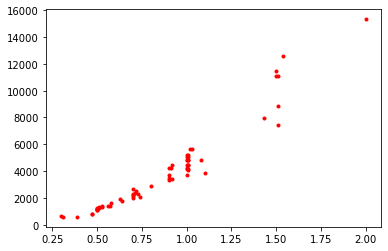

In [43]:
plt.plot(IS2E['carat'],IS2E['price'],'r.')

In [41]:
IS2E

,carat,cut,color,clarity,depth,table,price,x,y,z
1355,0.70,Fair,E,VS1,64.5,57.0,2964,5.59,5.55,3.59
2873,0.90,Fair,E,VS1,67.6,56.0,3276,5.94,5.90,4.00
10353,0.91,Fair,E,VS1,64.5,58.0,4770,6.14,6.10,3.95
18212,1.00,Fair,E,VS1,64.4,55.0,7392,6.33,6.30,4.07
25024,0.30,Fair,E,VS1,56.3,62.0,640,4.47,4.49,2.52
26202,1.50,Fair,E,VS1,65.4,57.0,15584,7.14,7.07,4.65
28270,0.25,Fair,E,VS1,55.2,64.0,361,4.21,4.23,2.33
31615,0.27,Fair,E,VS1,66.4,58.0,371,3.99,4.02,2.66
32550,0.30,Fair,E,VS1,64.5,56.0,799,4.26,4.20,2.73
46503,0.53,Fair,E,VS1,62.3,67.0,1778,5.22,5.11,3.22


In [3]:
#Read the raw data in
M  = pd.read_csv('Mahalanobis_Example_1.csv')

In [5]:
#calculate ancilliary statistics
  #centroid of the data
Mw     = np.mean(M['W'])
Mh     = np.mean(M['H'])
  #covariance matrix
S = np.cov(M['W'],M['H'])
  #most extreme x's
min_w = np.min(M['W'])
max_w = np.max(M['W'])
ex_w  = min_w if np.abs(min_w) > np.abs(max_w) else max_w
idx_w = np.where(M['W'] == ex_w)[0][0]
  #locate the 'outlier'
Out_w = M['W'].iloc[idx_w]
Out_h = M['H'].iloc[idx_w]
  #naive Z-scores
Stdw = np.std(M['W'])
Stdh = np.std(M['H'])
Zw = (Out_w - Mw)/Stdw
Zh = (Out_h - Mh)/Stdh
print(Zw,Zh)

-2.4916913823203024 -2.817894301843987


In [11]:
#rotate the distribution
  #rotation amount
rot = 1.0/np.sqrt(2.0)
M['X'] =  rot*M['W'] + rot*M['H']
M['Y'] =  rot*M['W'] - rot*M['H']
Mx     = np.mean(M['X'])
My     = np.mean(M['Y'])
Stdx   = np.std(M['X'])
Stdy   = np.std(M['Y'])
  #outlier in new coords
Out_x = M['X'].iloc[idx_w]
Out_y = M['Y'].iloc[idx_w]
  #diagonalized Z-score
RZx = (M['X'].iloc[idx_w] - Mx)/Stdx
RZy = (M['Y'].iloc[idx_w] - My)/Stdy
print(RZx,RZy)

-2.740013204109833 0.2442793302366915


(-35.0, 35.0)

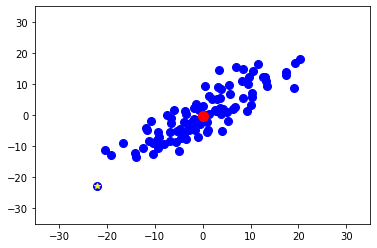

In [12]:
plt.plot(M['W'],M['H'],color='blue',marker='o',markersize=8,linestyle='none')
plt.plot(M['W'].iloc[idx_w],M['H'].iloc[idx_w],color='yellow',marker='*')
plt.plot(Mx,My,color='red',marker='o',markersize=10)
plt.xlim([-35,35])
plt.ylim([-35,35])

(-35.0, 35.0)

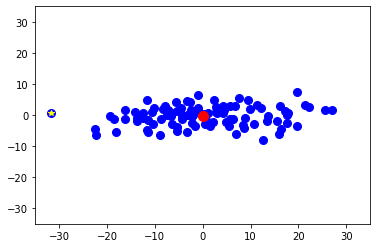

In [13]:
plt.plot(M['X'],M['Y'],color='blue',marker='o',markersize=8,linestyle='none')
plt.plot(M['X'].iloc[idx_w],M['Y'].iloc[idx_w],color='yellow',marker='*')
plt.plot(Mx,My,color='red',marker='o',markersize=10)
plt.xlim([-35,35])
plt.ylim([-35,35])

In [15]:
#calculate the distances
dist_out_WH = np.sqrt( (Out_w - Mw)**2 + (Out_h - Mh)**2 )
dist_out_XY = np.sqrt( (Out_x - Mx)**2 + (Out_y - My)**2 )
print(dist_out_WH,dist_out_XY)

31.79175440116234 31.79175440116234


In [35]:
X = 0 + Mx
Y = 31.79 + My
W = rot*X - rot*Y
H = rot*X + rot*Y

(-35.0, 35.0)

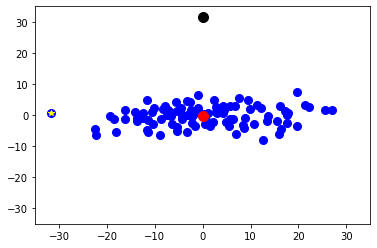

In [36]:
plt.plot(M['X'],M['Y'],color='blue',marker='o',markersize=8,linestyle='none')
plt.plot(M['X'].iloc[idx_w],M['Y'].iloc[idx_w],color='yellow',marker='*')
plt.plot(Mx,My,color='red',marker='o',markersize=10)
plt.plot(X,Y,color='black',marker='o',markersize=10)
plt.xlim([-35,35])
plt.ylim([-35,35])

In [37]:
Z = Y/Stdy

In [38]:
print(Z)

10.156383603256174


In [39]:
print( np.sqrt( (X - Mx)**2 + (Y - My)**2 ) )

31.79
